In [1]:
import os
import argparse
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

from object_detection.dataset.bdd100k import BDD
from object_detection.boundingbox.utils import mark_bounding_boxes
from lava.lib.dl import slayer

import ipyplot
from matplotlib import animation
import IPython.display as ipd

## BDD 100K dataset

In [2]:
root = '/home/lecampos/data/bdd100k'

train_set = BDD(root=root, dataset='track', train=True, seq_len=64, randomize_seq=True, augment_prob=0.2)
test_set = BDD(root=root, dataset='track', train=False)

In [3]:
print(f'{len(train_set) = }')
print(f'{len(test_set) = }')

len(train_set) = 1400
len(test_set) = 200


In [4]:
print(f'{train_set.classes = }')
print(f'{train_set.idx_map = }')

train_set.classes = ['bicycle', 'bus', 'car', 'motorcycle', 'other person', 'other vehicle', 'pedestrian', 'rider', 'trailer', 'train', 'truck']
train_set.idx_map = {'bicycle': 0, 'bus': 1, 'car': 2, 'motorcycle': 3, 'other person': 4, 'other vehicle': 5, 'pedestrian': 6, 'rider': 7, 'trailer': 8, 'train': 9, 'truck': 10}


In [7]:
idx = np.random.randint(len(train_set))
image, annotation = train_set[idx]
to_display = []
for idx in range(image.shape[-1]):
    to_display.append(mark_bounding_boxes(image[:,:,:,idx],
                                          annotation[idx]['annotation']['object'],
                                          thickness=1))

# ipyplot.plot_images(to_display, max_images=5, img_width=448)
fig, ax = plt.subplots(figsize=(5, 5))
img_plt = ax.imshow(to_display[0])
ax.axis('off')

def animate(i):
    img_plt.set_data(to_display[i])

anim = animation.FuncAnimation(fig, animate, frames=len(to_display), interval=40, repeat=True)
plt.close(fig)
ipd.HTML(anim.to_jshtml())

KeyboardInterrupt: 

In [8]:
# Test annotation_from_tensor and tensor_from_annotation
from object_detection.boundingbox.utils import annotation_from_tensor, tensor_from_annotation
tensor = tensor_from_annotation(annotation[0])
new_ann = annotation_from_tensor(tensor,
                                 frame_size=annotation[0]['annotation']['size'],
                                 object_names=train_set.classes)
print(annotation[0]['annotation']['size'])

KeyboardInterrupt: 

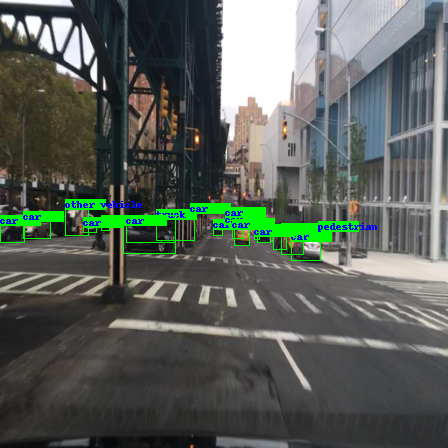

In [8]:
display(mark_bounding_boxes(image[:,:,:,0],
                            annotation[0]['annotation']['object'],
                            thickness=1))